# HW 8 - The Solar system

### Name: Mohamed Gamal Zaid
### ID: 201700399

In [1]:
import numpy as np
from numpy.random import randint as rand
import matplotlib.pyplot as plt
import time
from scipy.integrate import odeint
from matplotlib.pyplot import cm


## Equation of motion for Earth around the Sun

$\dfrac{dv_x}{dt}=-\dfrac{G M_S x}{r^3}$

$\dfrac{dx}{dt}=v_x$ 

$\dfrac{dv_y}{dt}=-\dfrac{G M_S y}{r^3}$

$\dfrac{dv_x}{dt}=v_y$


## Units
Assuming the earth a circular orbit, v is velocity of earth

$\dfrac{M_E v^2}{r}=F_G=\dfrac{G M_S M_E}{r^2}$

we have:  $v=\frac{2 \pi r}{1 yr}=2 \pi{\frac{AU}{yr}}$

So: $G M_S = v^2 r = 4 \pi ^2 \frac{AU^3}{yr^2}$

## Computational Solutions
$v_{x,i+1} = v_{x,i} - \frac{4 \pi ^2 x_i}{r_i^3} \Delta t$

$x_{i+1}=x_i + v_{x,i+1} \Delta t$

$v_{y,i+1} = v_{y,i} - \frac{4 \pi ^2 y_i}{r_i^3} \Delta t$

$y_{i+1}=y_i + v_{y,i+1} \Delta t$

Note that we have used the Euler-Cromer method.
That is, we use the previous values of position and velocity to update the velocities,
while the previous values of position and the new values of velocity are used to
update the positions.

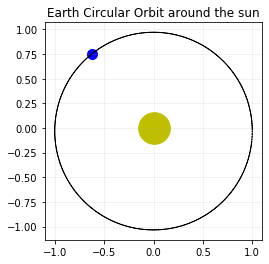

In [2]:
x0=1
y0=0
vx0=0
vy0=2 * np.pi
animate = False

tS=0
tE=4
dt= 0.01


def initialize(x0 ,y0 ,vx0 ,vy0, dt=dt, tS=tS, tE=tE):
    timeRange = np.arange(tS,tE,dt)
    ts = timeRange.size

    x  = np.zeros(ts, dtype=float)
    y  = np.zeros(ts, dtype=float)
    vx = np.zeros(ts, dtype=float)
    vy = np.zeros(ts, dtype=float)

    x[0] = x0
    y[0] = y0
    vx[0]= vx0
    vy[0]= vy0
    return x,y,vx,vy,ts

def term(i1, i2 ,dt=dt): 
    return 4*np.power(np.pi,2)*i1*dt/np.power(np.power(i1,2)+np.power(i2,2),3/2)

x,y,vx,vy,ts = initialize(x0, y0, vx0, vy0)

for t in range(ts-1):
    vx[t+1]=vx[t] - term(x[t],y[t])
    vy[t+1]=vy[t] - term(y[t],x[t])
    
    x[t+1]=x[t]+vx[t+1]*dt
    y[t+1]=y[t]+vy[t+1]*dt

fig, ax = plt.subplots()
ax.set_aspect('equal')
title = "Earth Circular Orbit around the sun"
plt.title(title)
pos = rand(ts)
plt.scatter(x[pos],y[pos],c='b',s=100,marker='o',label='Earth')
plt.plot(x,y,c='k',lw=1,ls=':')
plt.scatter(0,0,s=1000,c='y',marker='o',label='Sun')
plt.grid(alpha=0.2)
plt.savefig(title+".jpeg",dpi=300)
plt.close("All")

if animate:
    for t in range(ts-1):
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        plt.scatter(x[t],y[t],c='b',s=100,marker='o',label='Earth')
        plt.plot(x,y,c='k',lw=1,ls=':')
        plt.scatter(0,0,s=1000,c='y',marker='o',label='Sun')
        #plt.legend(loc='best')
        plt.grid(alpha=0.2)
        plt.savefig("run\\"+str(t)+"jpeg",dpi=300)
        plt.close("All")

# Question 1 [Kepler Laws]

## Problem 4.3 [Kepler's 2nd Law] 
- part I: I only adjusted the intital value of vy to get an elliptical orbit
- part II:
    1. I generated many pairs of points on the ellipse at random 
    2. Calculated the area between them and the time difference between them.
- part III: As I am calculating a & b and they are not equal, that is a quantitave check for the ellipse.

$$ A= \frac{1}{2}a b \Big( tan^{-1}\big(\frac{a}{b} tan(\theta_2)\big) - tan^{-1}\big(\frac{a}{b} tan(\theta_1)\big) \Big) $$

Yes


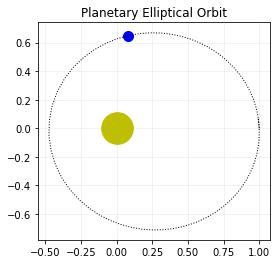

In [3]:
#Generate an elliptical orbit
x,y,vx,vy,ts = initialize(x0, y0, vx0, vy0=vy0*.8, dt=0.001)
for t in range(ts-1):
    vx[t+1]=vx[t] - term(x[t],y[t])
    vy[t+1]=vy[t] - term(y[t],x[t])
    
    x[t+1]=x[t]+vx[t+1]*dt
    y[t+1]=y[t]+vy[t+1]*dt

    if y[t-10]<0 and y[t+1]>0.1:
        print("Yes")
        x=x[:t+1]
        y=y[:t+1]
        break
            
        
fig, ax = plt.subplots()
ax.set_aspect('equal')
title = "Planetary Elliptical Orbit"
plt.title(title)
lx=len(x)
pos = rand(lx)
plt.scatter(x[pos],y[pos],c='b',s=100,marker='o',label='Earth') #Earth location chosen at random
plt.plot(x,y,c='k',lw=1,ls=':')
plt.scatter(0,0,s=1000,c='y',marker='o',label='Sun')
plt.grid(alpha=0.2)
plt.savefig(title+".jpeg",dpi=300)


$$$$

The ellipse has a= 0.737 &b= 0.69


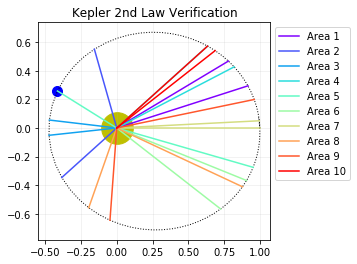

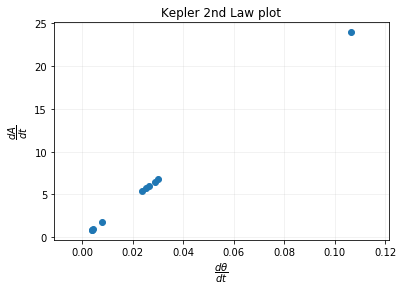

In [4]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
title = "Kepler 2nd Law Verification"
plt.title(title)
lx=len(x)
pos = rand(lx)
plt.scatter(x[pos],y[pos],c='b',s=100,marker='o')
plt.plot(x,y,c='k',lw=1,ls=':')
plt.scatter(0,0,s=1000,c='y',marker='o')
plt.grid(alpha=0.2)
plt.savefig(title + ",.jpeg", dpi=300)

#for the given ellipse
a=(np.max(x)-np.min(x))/2
b=(np.max(y)-np.min(y))/2

print("The ellipse has a= "+str(np.round(a,3))+" &b= "+str(np.round(b,3)))

#pairs of points chosen at random
n=10
dts = np.zeros(n)
areas = np.zeros(n)
dtheta = np.zeros(n)
color=cm.rainbow(np.linspace(0, 1, n))

for i in range(n):
    p1=rand(lx)
    p2=rand(lx)
    dts[i]=np.abs(p2-p1)
    #pts=np.array([[y[p1],y[p2]], [x[p1],x[p2]]])
    tan_th = a/b*np.unwrap(np.array([np.divide(y[p1],x[p1]),np.divide(y[p2],x[p2])]))
    dtheta[i] = np.abs(np.diff(np.arctan(tan_th)))
    areas[i] = .5*a*b*np.deg2rad(dtheta[i])
    dts[i] = np.abs(p2-p1)*dt
    plt.plot([0,x[p1]],[0,y[p1]], c = color[i],label = 'Area '+str(i+1))
    plt.plot([0,x[p2]],[0,y[p2]], c = color[i])

    
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

fig = plt.figure()
plt.scatter(np.divide(areas,dts), np.divide(dtheta,dts))
plt.grid(alpha = 0.2)
plt.ylabel(r'$\dfrac{dA}{dt}$')
plt.xlabel(r'$\dfrac{d\theta}{dt}$')
title = "Kepler 2nd Law plot"
plt.title(title)
plt.savefig(title + ",.jpeg", dpi=300)



## Problem 4.5 [Energies]
### Potential Energy
$V=-\dfrac{G M_S M_E}{r} \Rightarrow \dfrac{V}{M_E}=-\dfrac{G M_S}{r}=-\dfrac{4\pi^2}{r}$
### Kinetic Energy

from $F_G=\dfrac{G M_S M_E}{r^2}=M_E a =M_E \omega^2 r$ 

we get $\omega^2 r = \dfrac{G M_S}{r^2}$

so $T = \frac{1}{2} M_E v^2 =\frac{1}{2} M_E \omega^2 r^2 =\frac{1}{2} M_E \dfrac{G M_S}{r}$

$ \Rightarrow \dfrac{T}{M_E}=\frac{1}{2} \dfrac{G M_S}{r}=\dfrac{2\pi^2}{r}=-\dfrac{V}{2M_E}$

### Angular Momentum

$L= M_E v r = M_E \omega r^2 = M_E \sqrt{G M_S r} = 2 M_E \pi \sqrt{r} \Rightarrow \dfrac{L}{M_E}= 2 \pi \sqrt{r}$

I noticed the are not really constant in the circular case, but I figured that's due to the approximation of r used by Euler-Cromer method
That also carries-on for Angular momentum but since we have a square root of r, the variation extrapolates.

Yes
102
102
Yes
66


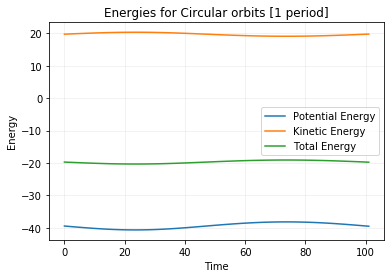

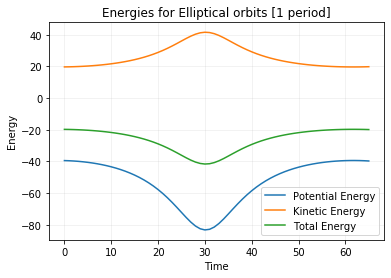

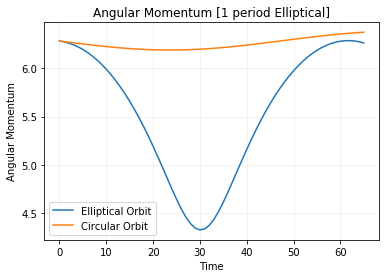

In [5]:
for i in range(2):
    if i:
        vy0=vy0*0.8
        orbit = 'Elliptical'
    else:
        orbit = 'Circular'
        vy0=2 * np.pi

    x,y,vx,vy,ts = initialize(x0, y0, vx0, vy0, dt=0.001)

    for t in range(ts-1):
        vx[t+1]=vx[t] - term(x[t],y[t])
        vy[t+1]=vy[t] - term(y[t],x[t])

        x[t+1]=x[t]+vx[t+1]*dt
        y[t+1]=y[t]+vy[t+1]*dt



        if y[t-10]<0 and y[t+1]>0.1:
            print("Yes")
            x=x[:t+1]
            y=y[:t+1]
            break

    n=len(x)
    V = np.zeros(n) #Potential Energy
    T = np.zeros(n) #Kinetic Energy
    E = np.zeros(n)
    print(n)
    if i==0: 
        print(n)
        L = np.zeros([2,n])

    for t in range(n):
        r = np.sqrt(np.power(x[t],2)+np.power(y[t],2))
        #r=np.round(r,1)
        V[t] = - 4 * np.power(np.pi,2) / r
        T[t] = -V[t]/2
        E[t] = V[t] + T[t]
        #r=np.round(r)
        L[i,t] = 2 * np.pi * np.sqrt(r)
    fig=plt.figure()
    plt.plot(range(n),V,label="Potential Energy")
    plt.plot(range(n),T,label="Kinetic Energy")
    plt.plot(range(n),E,label="Total Energy")
    plt.legend()
    plt.grid(alpha=0.2)
    Title="Energies for "+orbit+" orbits [1 period]"
    plt.title(Title)
    plt.xlabel("Time")
    plt.ylabel("Energy")
    plt.savefig(Title+".jpeg",dpi=300)

fig=plt.figure()
plt.plot(range(n),L[1][:n],label="Elliptical Orbit")
plt.plot(range(n),L[0][:n],label="Circular Orbit")

plt.legend()
plt.grid(alpha=0.2)
Title="Angular Momentum [1 period Elliptical]"
plt.title(Title)
plt.xlabel("Time")
plt.ylabel("Angular Momentum")
plt.savefig(Title+".jpeg",dpi=300)

## Problem 4.8 [Kepler's 3rd Law]
-referencing to Bode's Law, I choose the initial value of x to double each time which approximates the actual semi major axis of planetary orbits.


0.25
0.5
The orbit Closed for a= 0.5 vy0= 6.283185307179586
1.0
The orbit Closed for a= 1.0 vy0= 6.283185307179586
2.0
The orbit Closed for a= 2.0 vy0= 5.654866776461628
4.0
The orbit Closed for a= 4.0 vy0= 3.7699111843077517
8.0
The orbit Closed for a= 8.0 vy0= 2.5132741228718345
[1.28680295 1.01626038 1.00277677 1.00198096 1.00177095]


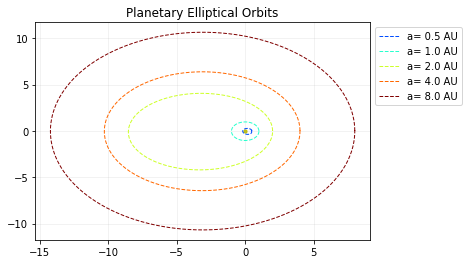

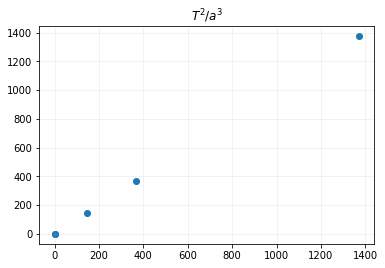

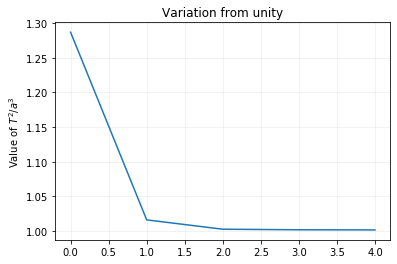

In [6]:
nOrbits=6
orbits=np.zeros(nOrbits)
p=np.zeros(nOrbits)
orbits[0]=0.25
for i in range(1,nOrbits):
    orbits[i]=orbits[i-1]*2
    
color=cm.jet(np.linspace(0, 1, nOrbits))

fig = plt.figure()
title = "Planetary Elliptical Orbits"
plt.title(title)
plt.scatter(0,0,s=10,c='y',marker='o')

for i in range(nOrbits):
    x0=orbits[i]
    anOrbit = False
    print(x0)
    for ratio in range(10,0,-1):
        vy0 = 2 * np.pi*ratio/10

        x,y,vx,vy,ts = initialize(x0, y0, vx0, vy0=vy0, dt=0.001)
        for t in range(ts-1):
            vx[t+1]=vx[t] - term(x[t],y[t])
            vy[t+1]=vy[t] - term(y[t],x[t])

            x[t+1]=x[t]+vx[t+1]*dt
            y[t+1]=y[t]+vy[t+1]*dt

            if y[t-10]<0 and y[t+1]>0.1:
                print("The orbit Closed for a= "+str(x0)+" vy0= "+str(vy0))
                x=x[:t+1]
                y=y[:t+1]
                plt.plot(x,y,c=color[i],lw=1,ls='--',label='a= '+str(x0)+' AU',alpha=1)
                p[i]=t*dt
                orbits[i]=(np.max(x)-np.min(x))/2
                
                anOrbit=True
                break
        if anOrbit: break


orbits=orbits[p.nonzero()]
p=p[p.nonzero()]

plt.legend()
plt.grid(alpha=0.2)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.savefig(title+".jpeg",dpi=300)

fig = plt.figure()
plt.scatter(np.power(orbits,3),np.power(p,2))
plt.title(r"$T^2/a^3$")
plt.grid(alpha=0.2)
plt.savefig("Kepler 3rd.jpeg", dpi=300)


fig = plt.figure()
plt.plot(np.divide(np.power(p,2),np.power(orbits,3)))
print(np.divide(np.power(p,2),np.power(orbits,3)))
plt.title("Variation from unity")
plt.ylabel(r"Value of $T^2/a^3$")
plt.grid(alpha=0.2)
plt.savefig("Kepler 3rd_2.jpeg", dpi=300)


# Question 2 [Precession of the perihelion of Mercury]


## Figure 4.8,9,10
$F_G=\dfrac{G M_S M_E}{r^2}\big(1+\dfrac{\alpha}{r^2}\big)$


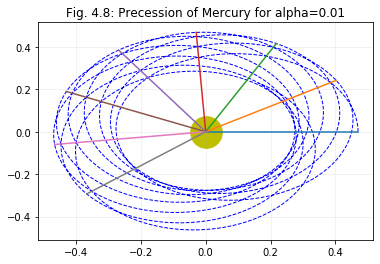

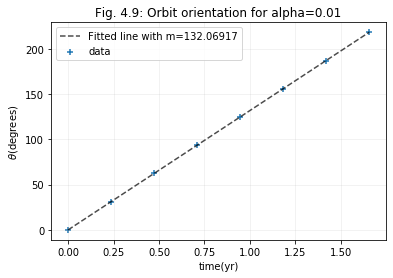

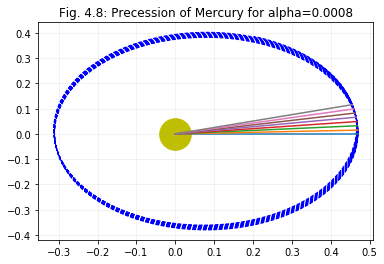

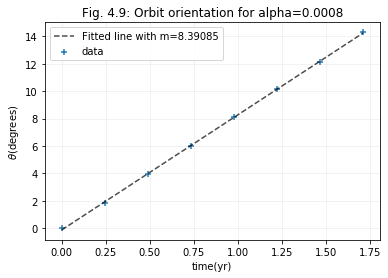

In [7]:
alphas=[0.01,0.0008]
for alpha in alphas:
    fig = plt.figure()
    title = "Fig. 4.8: Precession of Mercury for alpha=" + str(alpha)
    plt.title(title)
    plt.grid(alpha=0.2)
    plt.scatter(0,0,s=1000,c='y',marker='o')

    x0=0.47
    vy0 = 8.2

    dt=0.0001
    def termEinstein(i1, i2 ,dt=dt,alpha=alpha): 
        sqrt_r = np.power(i1,2)+np.power(i2,2)
        return 4*np.power(np.pi,2)*i1*dt/np.power(sqrt_r,3/2)*(1+alpha/sqrt_r)
    x,y,vx,vy,ts = initialize(x0, y0, vx0, vy0=vy0, dt=dt,tS=0, tE=2)
    orbitsCnt = 0

    for t in range(ts-1):
        orbitsPassed =(t*dt)/0.24 
        if orbitsPassed>orbitsCnt:
            orbitsCnt+=1
            #print (orbitsCnt)
        vx[t+1]=vx[t] - termEinstein(x[t],y[t])
        vy[t+1]=vy[t] - termEinstein(y[t],x[t])

        x[t+1]=x[t]+vx[t+1]*dt
        y[t+1]=y[t]+vy[t+1]*dt

    plt.plot(x,y,c='b',lw=1,ls='--',label='a= '+str(x0)+' AU',alpha=1)
    r=np.sqrt(np.power(x,2)+np.power(y,2))

    maxes = np.sort(np.argsort(r)[-orbitsCnt*2:-1])

    thetas=[0]
    adjustedThetas=[0]
    times=[0]
    plt.plot([0,x0],[0,0])
    cntNeg=0
    for i in range(1,maxes.size-1):
        if(np.abs(maxes[i]-maxes[i+1])>10):
            newAngle = np.arctan(np.divide(y[maxes[i]],x[maxes[i]]))
            thetas.append(newAngle)
            times.append(dt*maxes[i])
            plt.plot([0,x[maxes[i]]],[0,y[maxes[i]]])

    thetas = np.rad2deg(np.array(thetas))
    #thetas = np.array(thetas)

    for i in range(1,thetas.size):
        newAngle = thetas[i]
        if (newAngle<0 and (thetas[i-1]>0)):
            cntNeg+=1
        if newAngle<0:
            newAngle += 180

        else:
            newAngle+= cntNeg*180
        adjustedThetas.append(newAngle)


    fig = plt.figure()
    plt.title("Fig. 4.9: Orbit orientation for alpha="+str(alpha))
    plt.scatter(times,adjustedThetas,marker='+',label='data')
    x = np.array(times)
    y = adjustedThetas
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    plt.plot(x, m*x + c, label='Fitted line with m='+str(np.round(m,5)),ls='--',c='k',alpha=0.7)
    plt.grid(alpha=0.2)
    plt.legend()
    plt.xlabel("time(yr)")
    plt.ylabel(r"$\theta $(degrees)")
    plt.savefig(title+'.jpeg')

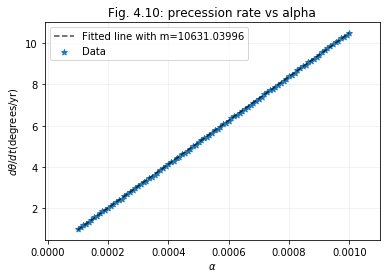

In [38]:
alphas = np.linspace(0.0001,0.001,100)
slopes = []
for alpha in alphas:
    x0=0.47
    vy0 = 8.2

    dt=0.0001
    def termEinstein(i1, i2 ,dt=dt,alpha=alpha): 
        sqrt_r = np.power(i1,2)+np.power(i2,2)
        return 4*np.power(np.pi,2)*i1*dt/np.power(sqrt_r,3/2)*(1+alpha/sqrt_r)
    x,y,vx,vy,ts = initialize(x0, y0, vx0, vy0=vy0, dt=dt,tS=0, tE=2)
    orbitsCnt = 0

    for t in range(ts-1):
        orbitsPassed =(t*dt)/0.24 
        if orbitsPassed>orbitsCnt:
            orbitsCnt+=1
            #print (orbitsCnt)
        vx[t+1]=vx[t] - termEinstein(x[t],y[t])
        vy[t+1]=vy[t] - termEinstein(y[t],x[t])

        x[t+1]=x[t]+vx[t+1]*dt
        y[t+1]=y[t]+vy[t+1]*dt

    r=np.sqrt(np.power(x,2)+np.power(y,2))

    maxes = np.sort(np.argsort(r)[-orbitsCnt*2:-1])

    thetas=[0]
    adjustedThetas=[0]
    times=[0]
    #plt.plot([0,x0],[0,0])
    cntNeg=0
    for i in range(1,maxes.size-1):
        if(np.abs(maxes[i]-maxes[i+1])>10):
            newAngle = np.arctan(np.divide(y[maxes[i]],x[maxes[i]]))
            thetas.append(newAngle)
            times.append(dt*maxes[i])
            #plt.plot([0,x[maxes[i]]],[0,y[maxes[i]]])

    thetas = np.rad2deg(np.array(thetas))

    for i in range(1,thetas.size):
        newAngle = thetas[i]
        if (newAngle<0 and (thetas[i-1]>0)):
            cntNeg+=1
        if newAngle<0:
            newAngle += 180

        else:
            newAngle+= cntNeg*180
        adjustedThetas.append(newAngle)


    x = np.array(times)
    y = adjustedThetas
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    slopes.append(m)

fig = plt.figure()

plt.title("Fig. 4.10: precession rate vs alpha")    
plt.scatter(alphas, slopes,marker='*',label='Data')
x = np.array(alphas)
y = slopes
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, m*x + c, label='Fitted line with m='+str(np.round(m,5)),ls='--',c='k',alpha=0.7)
plt.grid(alpha=0.2)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$d\theta/dt $(degrees/yr)")
plt.xlim((alphas[0]-alphas[1]),alphas[-1]+alphas[0])
plt.legend()
plt.savefig(title+'.jpeg')

## Precession rate due to theory of General Relativity
### using extrapolation of the fitted line to calculate alpha = $ 1.1 \times 10^{-8}$

In [39]:
x=1.1*np.power(10.0,-8)
print(str(np.round(m*x*3600*100,4))+' Arcseconds/Century')

42.0989 Arcseconds/Century
